In [1]:
import pickle
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
df = pd.DataFrame({
    's' : [
        # top half
        'j1', 's1', 's1', 'a1', 't1',
        's2', 's2', 'a2', 't2', 'j2', 'j2',
        'j3', 's3', 's3', 'a3', 't3',
        's4', 's4', 'a4', 't4', 'j4', 'j4',
        'j5', 's5', 's5', 'a5', 't5',
        's6', 's6', 'a6', 't6', 'j6', 'j6',
        'j7', 's7', 's7', 'a7', 't7',
        's8', 's8', 'a8', 't8', 'j8', 'j8',
        'j9', 's9', 's9', 'a9', 't9',
        's10', 's10', 'a10', 't10', 'j10',
        'm10', 'n10',
        'n9', 'm9', 'm9',
        'm8', 'n8',
        'n7', 'm7', 'm7',
        'm6', 'n6',
        'n5', 'm5', 'm5',
        'm4', 'n4',
        'n3', 'm3', 'm3',
        'm2', 'n2',
        'n1', 'm1',
        # bottom half
        'j11', 's11', 's11', 'a11', 't11',
        's12', 's12', 'a12', 't12', 'j12', 'j12',
        'j13', 's13', 's13', 'a13', 't13',
        's14', 's14', 'a14', 't14', 'j14', 'j14',
        'j15', 's15', 's15', 'a15', 't15',
        's16', 's16', 'a16', 't16', 'j16', 'j16',
        'j17', 's17', 's17', 'a17', 't17',
        's18', 's18', 'a18', 't18', 'j18', 'j18',
        'j19', 's19', 's19', 'a19', 't19',
        's20', 's20', 'a20', 't20', 'j20',
        'm20', 'n20',
        'n19', 'm19', 'm19',
        'm18', 'n18',
        'n17', 'm17', 'm17',
        'm16', 'n16',
        'n15', 'm15', 'm15',
        'm14', 'n14',
        'n13', 'm13', 'm13',
        'm12', 'n12',
        'n11', 'm11',
        # connecting
        'm20', 'n20', 'n2',
        'n18', 'n4',
        'n16', 'n6',
        'n14', 'n8',
        'n12', 'n10', 'm10'
    ],
    't' : [
        # top half
        's1', 't1', 'a1', 't1', 's2',
        't2', 'a2', 't2', 'j2', 'j3', 'm2',
        's3', 't3', 'a3', 't3', 's4',
        't4', 'a4', 't4', 'j4', 'j5', 'm4',
        's5', 't5', 'a5', 't5', 's6',
        't6', 'a6', 't6', 'j6', 'j7', 'm6',
        's7', 't7', 'a7', 't7', 's8',
        't8', 'a8', 't8', 'j8', 'j9', 'm8',
        's9', 't9', 'a9', 't9', 's10',
        't10', 'a10', 't10', 'j10', 'm10',
        'n10', 'n9',
        'm9', 'm8', 'j9',
        'n8', 'n7',
        'm7', 'm6', 'j7',
        'n6', 'n5',
        'm5', 'm4', 'j5',
        'n4', 'n3',
        'm3', 'm2', 'j3',
        'n2', 'n1',
        'm1', 'j1',
        # bottom half
        's11', 't11', 'a11', 't11', 's12',
        't12', 'a12', 't12', 'j12', 'j13', 'm12',
        's13', 't13', 'a13', 't13', 's14',
        't14', 'a14', 't14', 'j14', 'j15', 'm14',
        's15', 't15', 'a15', 't15', 's16',
        't16', 'a16', 't16', 'j16', 'j17', 'm16',
        's17', 't17', 'a17', 't17', 's18',
        't18', 'a18', 't18', 'j18', 'j19', 'm18',
        's19', 't19', 'a19', 't19', 's20',
        't20', 'a20', 't20', 'j20', 'm20',
        'n20', 'n19',
        'm19', 'm18', 'j19',
        'n18', 'n17',
        'm17', 'm16', 'j17',
        'n16', 'n15',
        'm15', 'm14', 'j15',
        'n14', 'n13',
        'm13', 'm12', 'j13',
        'n12', 'n11',
        'm11', 'j11',
        # connecting
        'm1', 'n1', 'n19',
        'n3', 'n17',
        'n5', 'n15',
        'n7', 'n13',
        'n9', 'n11', 'm11'
    ],
    'w' : [
        # top half
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 3.0,
        # bottom half
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 2.0, 3.0,
        2.0, 6.0, 6.0, 6.0, 3.0,
        6.0, 6.0, 6.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 2.0, 3.0,
        7.0, 5.0,
        7.0, 3.0,
        # connecting
        4.0, 4.0, 4.0,
        4.0, 4.0,
        4.0, 4.0,
        4.0, 4.0,
        4.0, 4.0, 4.0
    ]
})

In [3]:
priority_edges = {
    ('s1', 't1'),
    ('s2', 't2'),
    ('s3', 't3'),
    ('s4', 't4'),
    ('s5', 't5'),
    ('s6', 't6'),
    ('s7', 't7'),
    ('s8', 't8'),
    ('s9', 't9'),
    ('s10', 't10'),
    ('s11', 't11'),
    ('s12', 't12'),
    ('s13', 't13'),
    ('s14', 't14'),
    ('s15', 't15'),
    ('s16', 't16'),
    ('s17', 't17'),
    ('s18', 't18'),
    ('s19', 't19'),
    ('s20', 't20'),
    ('m3', 'j3'),
    ('m5', 'j5'),
    ('m7', 'j7'),
    ('m9', 'j9'),
    ('m13', 'j13'),
    ('m15', 'j15'),
    ('m17', 'j17'),
    ('m19', 'j19'),
    ('n1', 'm1'),
    ('j2', 'm2'),
    ('j4', 'm4'),
    ('j6', 'm6'),
    ('j8', 'm8'),
    ('n11', 'm11'),
    ('j12', 'm12'),
    ('j14', 'm14'),
    ('j16', 'm16'),
    ('j18', 'm18'),
    ('n2', 'n1'),
    ('n4', 'n3'),
    ('n6', 'n5'),
    ('n8', 'n7'),
    ('n10', 'n9'),
    ('n12', 'n11'),
    ('n14', 'n13'),
    ('n16', 'n15'),
    ('n18', 'n17'),
    ('n20', 'n19')
}

In [4]:
lot_req_rates = np.array([
    0.0, 0.0, 0.0, 116.1, 161.6, 0.0, 0.0, 85.4, 37.4, 2.7, 0.0, 85.4, 138.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 158.2, 32.1, 0.0, 87.4, 85.4, 0.0, 0.0, 40.0, 85.4, 0.0, 15.4, 123.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 89.8, 0.0, 0.0, 0.0, 158.2, 77.1, 0.0, 0.0, 55.3, 77.1, 0.0, 0.0, 284.3, 33.7, 0.0, 0.0, 20.7, 18.3, 0.0,
    84.2, 0.0, 0.0, 0.0, 116.1, 32.1, 0.0, 77.1, 81.8, 34.5, 0.0, 2.9, 266.5, 0.0, 0.0, 33.7, 19.0, 0.0, 15.4, 0.0,
    311.8, 18.2, 0.0, 158.5, 0.0, 0.0, 9.3, 298.9, 278.2, 7.7, 0.0, 373.1, 272.9, 19.7, 0.0, 31.7, 18.7, 0.0, 0.6, 65.4,
    0.0, 288.0, 220.1, 47.9, 48.3, 0.0, 378.1, 88.5, 44.4, 319.2, 387.5, 88.5, 23.4, 146.3, 31.7, 0.0, 0.0, 19.5, 31.1, 0.0,
    2.3, 70.6, 206.2, 0.0, 14.7, 568.5, 0.0, 0.0, 109.4, 0.0, 0.0, 0.0, 96.4, 219.2, 0.0, 0.0, 0.0, 17.2, 182.2, 2.6,
    72.9, 0.0, 0.0, 206.2, 471.8, 111.5, 0.0, 0.0, 109.4, 0.0, 0.0, 0.0, 315.6, 0.0, 0.0, 192.2, 0.0, 0.0, 0.0, 9.9,
    37.0, 0.2, 0.0, 97.0, 318.4, 53.5, 0.0, 35.5, 0.0, 0.0, 256.2, 256.2, 191.7, 0.0, 0.0, 17.8, 98.7, 0.0, 2.4, 17.8,
    0.0, 41.4, 111.7, 1.3, 0.0, 394.9, 256.2, 220.7, 0.0, 0.0, 0.0, 0.0, 3.5, 203.5, 17.8, 0.0, 0.0, 112.0, 15.5, 0.0,
    0.0, 72.9, 113.8, 92.4, 0.0, 583.3, 0.0, 0.0, 0.0, 109.4, 0.0, 0.0, 0.0, 315.6, 192.2, 0.0, 0.0, 0.0, 9.9, 0.0,
    72.9, 0.0, 0.0, 7.9, 670.2, 111.5, 0.0, 0.0, 15.2, 94.2, 0.0, 0.0, 315.6, 0.0, 0.0, 0.0, 22.5, 0.0, 0.0, 179.6,
    46.3, 5.1, 0.0, 0.0, 46.3, 5.1, 19.1, 62.5, 435.2, 26.4, 0.0, 62.5, 0.0, 0.0, 0.0, 370.4, 213.7, 0.0, 114.0, 370.4,
    0.0, 41.1, 0.0, 0.0, 0.0, 41.1, 43.4, 0.0, 0.0, 378.7, 62.5, 0.0, 0.0, 0.0, 370.4, 0.0, 0.0, 228.0, 256.5, 0.0,
    0.0, 0.0, 2.0, 0.0, 0.0, 5.9, 257.5, 0.0, 0.0, 0.0, 332.8, 0.0, 14.6, 32.9, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 1.1, 6.8, 0.0, 0.0, 30.5, 271.6, 0.0, 0.0, 288.3, 47.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 0.0, 4.6, 0.0, 0.0, 0.0, 0.0, 0.0, 8.0, 332.5, 27.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.3, 0.9, 0.1, 3.5, 363.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 2.0, 0.0, 0.0, 5.9, 0.0, 0.0, 0.0, 310.4, 279.9, 0.0, 0.0, 47.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
    0.0, 0.0, 0.0, 2.0, 5.9, 0.0, 0.0, 590.3, 0.0, 0.0, 0.0, 0.0, 47.5, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
]).reshape((20, 20))

In [5]:
pos = {
    'j1' : (0, 13),
    's1' : (2, 13),
    'a1' : (5, 16),
    't1' : (8, 13),
    's2' : (11, 13),
    'a2' : (14, 16),
    't2' : (17, 13),
    'j2' : (19, 13),
    'j3' : (21, 13),
    's3' : (23, 13),
    'a3' : (26, 16),
    't3' : (29, 13),
    's4' : (32, 13),
    'a4' : (35, 16),
    't4' : (38, 13),
    'j4' : (40, 13),
    'j5' : (42, 13),
    's5' : (44, 13),
    'a5' : (47, 16),
    't5' : (50, 13),
    's6' : (53, 13),
    'a6' : (56, 16),
    't6' : (59, 13),
    'j6' : (61, 13),
    'j7' : (63, 13),
    's7' : (65, 13),
    'a7' : (68, 16),
    't7' : (71, 13),
    's8' : (74, 13),
    'a8' : (77, 16),
    't8' : (80, 13),
    'j8' : (82, 13),
    'j9' : (84, 13),
    's9' : (86, 13),
    'a9' : (89, 16),
    't9' : (92, 13),
    's10' : (95, 13),
    'a10' : (98, 16),
    't10' : (101, 13),
    'j10' : (103, 13),
    'm10' : (103, 10),
    'n10' : (96, 10),
    'n9' : (91, 10),
    'm9' : (84, 10),
    'm8' : (82, 10),
    'n8' : (75, 10),
    'n7' : (70, 10),
    'm7' : (63, 10),
    'm6' : (61, 10),
    'n6' : (54, 10),
    'n5' : (49, 10),
    'm5' : (42, 10),
    'm4' : (40, 10),
    'n4' : (33, 10),
    'n3' : (28, 10),
    'm3' : (21, 10),
    'm2' : (19, 10),
    'n2' : (12, 10),
    'n1' : (7, 10),
    'm1' : (0, 10),
    'm20' : (0, 6),
    'n20' : (7, 6),
    'n19' : (12, 6),
    'm19' : (19, 6),
    'm18' : (21, 6),
    'n18' : (28, 6),
    'n17' : (33, 6),
    'm17' : (40, 6),
    'm16' : (42, 6),
    'n16' : (49, 6),
    'n15' : (54, 6),
    'm15' : (61, 6),
    'm14' : (63, 6),
    'n14' : (70, 6),
    'n13' : (75, 6),
    'm13' : (82, 6),
    'm12' : (84, 6),
    'n12' : (91, 6),
    'n11' : (96, 6),
    'm11' : (103, 6),
    'j11' : (103, 3),
    's11' : (101, 3),
    'a11' : (98, 0),
    't11' : (95, 3),
    's12' : (92, 3),
    'a12' : (89, 0),
    't12' : (86, 3),
    'j12' : (84, 3),
    'j13' : (82, 3),
    's13' : (80, 3),
    'a13' : (77, 0),
    't13' : (74, 3),
    's14' : (71, 3),
    'a14' : (68, 0),
    't14' : (65, 3),
    'j14' : (63, 3),
    'j15' : (61, 3),
    's15' : (59, 3),
    'a15' : (56, 0),
    't15' : (53, 3),
    's16' : (50, 3),
    'a16' : (47, 0),
    't16' : (44, 3),
    'j16' : (42, 3),
    'j17' : (40, 3),
    's17' : (38, 3),
    'a17' : (35, 0),
    't17' : (32, 3),
    's18' : (29, 3),
    'a18' : (26, 0),
    't18' : (23, 3),
    'j18' : (21, 3),
    'j19' : (19, 3),
    's19' : (17, 3),
    'a19' : (14, 0),
    't19' : (11, 3),
    's20' : (8, 3),
    'a20' : (5, 0),
    't20' : (2, 3),
    'j20' : (0, 3)
}

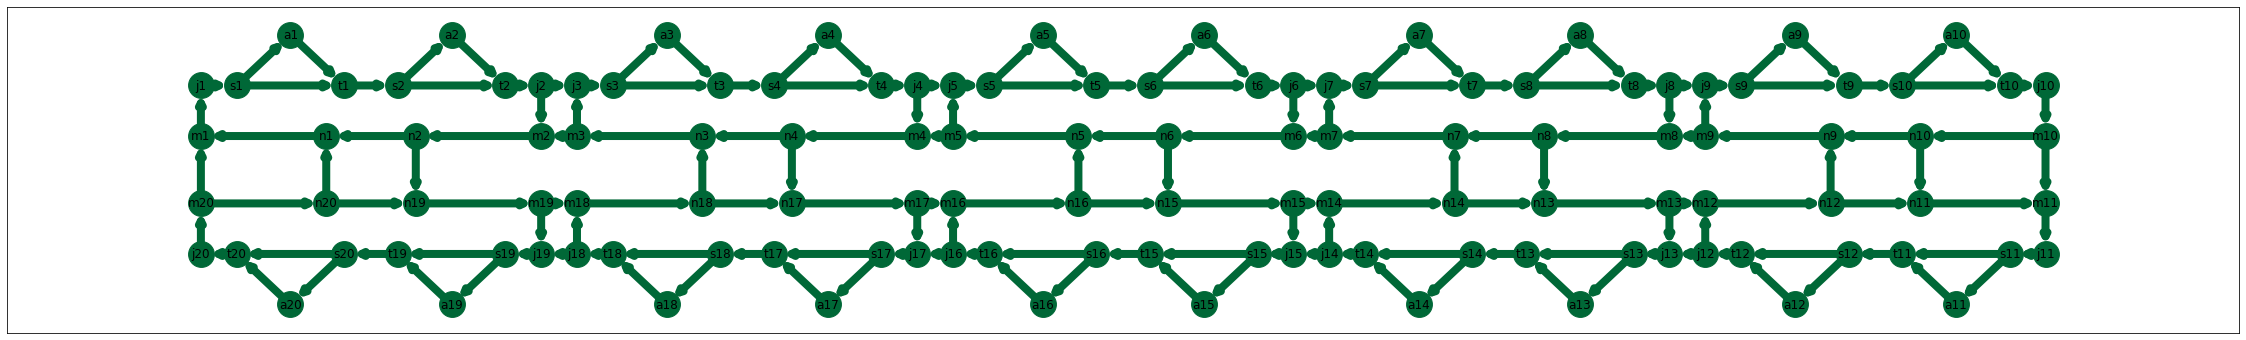

In [6]:
G = nx.from_pandas_edgelist(df, 's', 't', edge_attr=True, create_using=nx.DiGraph())
cmap = plt.get_cmap('RdYlGn_r')
fig, ax = plt.subplots(figsize=(40, 6))
nx.draw_networkx_nodes(G, pos=pos, ax=ax,
                       node_size=667,
                       node_color=[cmap(0.0)])
nx.draw_networkx_labels(G, pos=pos, ax=ax)
nx.draw_networkx_edges(G, pos=pos, ax=ax,
                       width=8.0,
                       edge_color=cmap(0.0))
# nx.draw_networkx_edge_labels(G, pos=pos, ax=ax,
#                              edge_labels=nx.get_edge_attributes(G, 'w'))
# plt.savefig('layout.png', dpi=300, bbox_inches='tight')
plt.show()

In [7]:
def partition(n):
    if type(n) is str:
        v = n
    else:
        v = n[1]
    try:
        i = int(v[-2:])
    except ValueError:
        i = int(v[-1:])
    return i - 1

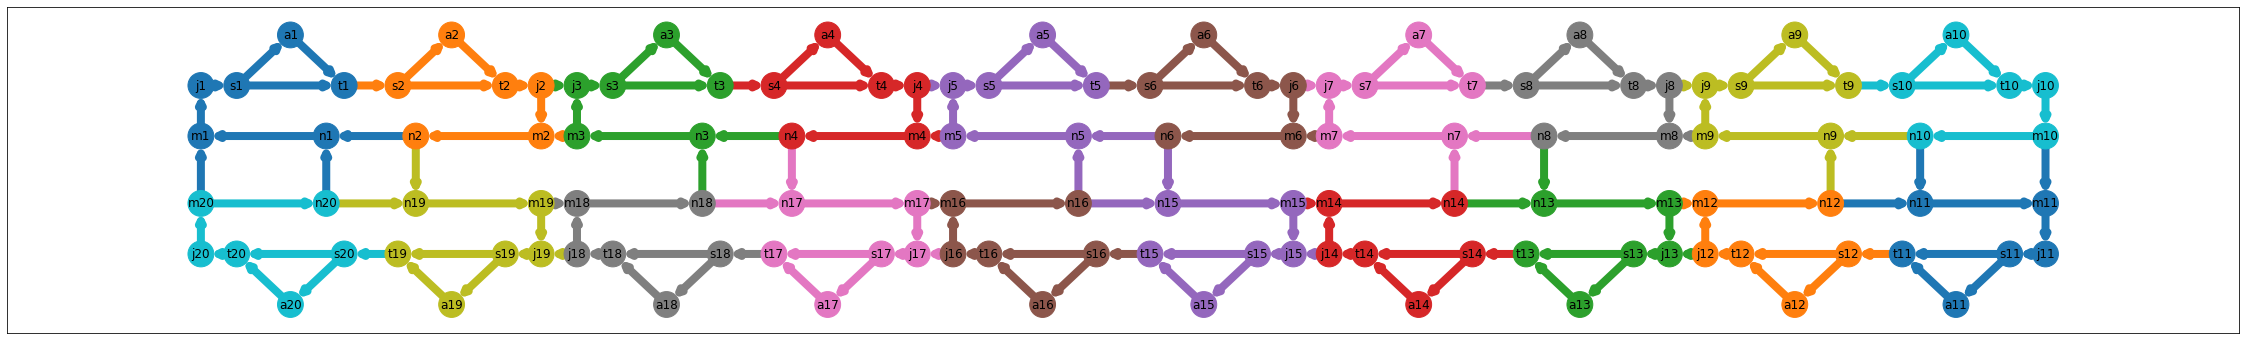

In [8]:
G = nx.from_pandas_edgelist(df, 's', 't', edge_attr=True, create_using=nx.DiGraph())
cmap = plt.get_cmap('RdYlGn_r')
colorizer = lambda n : 'C{}'.format(partition(n))
fig, ax = plt.subplots(figsize=(40, 6))
nx.draw_networkx_nodes(G, pos=pos, ax=ax,
                       node_size=667,
                       node_color=[colorizer(v) for v in G.nodes])
nx.draw_networkx_labels(G, pos=pos, ax=ax)
nx.draw_networkx_edges(G, pos=pos, ax=ax,
                       width=8.0,
                       edge_color=[colorizer(e) for e in G.edges])
# nx.draw_networkx_edge_labels(G, pos=pos, ax=ax,
#                              edge_labels=nx.get_edge_attributes(G, 'w'))
# plt.savefig('partition_layout.png', dpi=300, bbox_inches='tight')
plt.show()

In [9]:
ids = [''.join(e) for e in G.edges]
with open('data/sensor_graph/full_ids.txt', 'w') as handle:
    handle.write(','.join(ids))

In [10]:
ids = list(map(str, range(1, 21)))
with open('data/sensor_graph/part_ids.txt', 'w') as handle:
    handle.write(','.join(ids))

In [11]:
distances = {
    'from' : [],
    'to' : [],
    'distance' : []
}
# calculate routing protocol
iter_df = df.copy(deep=True)
# we add the node travel time to all edges
iter_df['w'] += 1.0
iter_G = nx.from_pandas_edgelist(iter_df, 's', 't', edge_attr=True, create_using=nx.DiGraph())
sp = dict(nx.all_pairs_dijkstra_path(iter_G, weight='w'))
spl = dict(nx.all_pairs_dijkstra_path_length(iter_G, weight='w'))
for s in G.edges:
    for t in G.edges:
        distances['from'].append(''.join(s))
        distances['to'].append(''.join(t))
        # add self-loops
        distances['distance'].append(spl[s[0]][s[1]] + spl[s[1]][t[0]])
distances = pd.DataFrame(distances)
distances.to_csv('data/sensor_graph/full_distances.csv', index=False)

In [12]:
# average pairwise distances under the partition
part_dists = {
    i : { j : 0 for j in range(20) } for i in range(20)
}
part_counts = {
    i : { j : 0 for j in range(20) } for i in range(20)
}
# calculate routing protocol
iter_df = df.copy(deep=True)
# we add the node travel time to all edges
iter_df['w'] += 1.0
iter_G = nx.from_pandas_edgelist(iter_df, 's', 't', edge_attr=True, create_using=nx.DiGraph())
sp = dict(nx.all_pairs_dijkstra_path(iter_G, weight='w'))
spl = dict(nx.all_pairs_dijkstra_path_length(iter_G, weight='w'))
for s in G.edges:
    for t in G.edges:
        # add self-loops
        part_dists[partition(s)][partition(t)] += spl[s[0]][s[1]] + spl[s[1]][t[0]]
        part_counts[partition(s)][partition(t)] += 1
distances = {
    'from' : [],
    'to' : [],
    'distance' : []
}
for i in range(20):
    for j in range(20):
        distances['from'].append(str(i + 1))
        distances['to'].append(str(j + 1))
        distances['distance'].append(part_dists[i][j] / part_counts[i][j])
distances = pd.DataFrame(distances)
distances.to_csv('data/sensor_graph/part_distances.csv', index=False)

In [13]:
def preprocess_full(G, oht_log, start, stop, interval=150):
    edgelist = list(G.edges)
    edgemap = dict(zip(edgelist, range(len(edgelist))))
    # inspired by our animate function implementation
    frame_i = [0]
    traffics = np.zeros(len(edgelist))
    ohtmap = {}
    # define the state update rule
    def update(i):
        # update traffic
        while True:
            uuid, l, t = oht_log[frame_i[0]]
            if t > i:
                break
            if type(l) is tuple:
                l_i = edgemap[l]
                traffics[l_i] += 1
                if uuid in ohtmap:
                    p_i = ohtmap[uuid]
                    traffics[p_i] -= 1
                ohtmap[uuid] = l_i
            frame_i[0] += 1
    # burn-in
    for i in range(start):
        update(i)
    # go time
    window = np.zeros(len(traffics))
    data = []
    for i in range(start, stop):
        window += traffics
        update(i)
        if i % interval == interval - 1:
            window /= interval
            data.append(window)
            window = np.zeros(len(traffics))
    data = np.array(data)
    idx = pd.to_datetime(np.arange(0, stop - start, interval), unit='s')
    cols = [''.join(e) for e in edgelist]
    return pd.DataFrame(data, index=idx, columns=cols)

In [14]:
def preprocess_part(G, oht_log, start, stop, interval=150):
    # inspired by our animate function implementation
    frame_i = [0]
    traffics = np.zeros(20)
    ohtmap = {}
    # define the state update rule
    def update(i):
        # update traffic
        while True:
            uuid, l, t = oht_log[frame_i[0]]
            if t > i:
                break
            if type(l) is tuple:
                l_i = partition(l)
                traffics[l_i] += 1
                if uuid in ohtmap:
                    p_i = ohtmap[uuid]
                    traffics[p_i] -= 1
                ohtmap[uuid] = l_i
            frame_i[0] += 1
    # burn-in
    for i in range(start):
        update(i)
    # go time
    window = np.zeros(len(traffics))
    data = []
    for i in range(start, stop):
        window += traffics
        update(i)
        if i % interval == interval - 1:
            window /= interval
            data.append(window)
            window = np.zeros(len(traffics))
    data = np.array(data)
    idx = pd.to_datetime(np.arange(0, stop - start, interval), unit='s')
    cols = list(map(str, range(1, 21)))
    return pd.DataFrame(data, index=idx, columns=cols)

In [ ]:
burn_in = 36000
T = burn_in + 86400
for j in range(1, 101):
    with open('data/fab/trail{}.pickle'.format(j), 'rb') as handle:
        log = pickle.load(handle)
        data = preprocess_full(G, log['oht'], burn_in, T)
        data.to_hdf('data/fab_full.h5', key='data{}'.format(j), mode='a')

In [ ]:
burn_in = 36000
T = burn_in + 86400
for j in range(1, 5):
    with open('data/toy/trail{}.pickle'.format(j), 'rb') as handle:
        log = pickle.load(handle)
        data = preprocess_full(G, log['oht'], burn_in, T)
        data.to_hdf('data/toy_full.h5', key='data{}'.format(j), mode='a')

In [ ]:
burn_in = 36000
T = burn_in + 86400
for j in range(1, 101):
    with open('data/fab/trail{}.pickle'.format(j), 'rb') as handle:
        log = pickle.load(handle)
        data = preprocess_part(G, log['oht'], burn_in, T)
        data.to_hdf('data/fab_part.h5', key='data{}'.format(j), mode='a')

In [ ]:
burn_in = 36000
T = burn_in + 86400
for j in range(1, 5):
    with open('data/toy/trail{}.pickle'.format(j), 'rb') as handle:
        log = pickle.load(handle)
        data = preprocess_part(G, log['oht'], burn_in, T)
        data.to_hdf('data/toy_part.h5', key='data{}'.format(j), mode='a')

In [ ]:
# edge weight feature under the partition model is the average of the constituent edge weights
for j in range(1, 101):
    part_dists = np.zeros(20)
    part_counts = np.zeros(20)
    # calculate routing protocol
    iter_df = pd.read_csv('data/fab/full_graph{}.csv'.format(j), index_col=0)
    for _, r in iter_df.iterrows():
        i = partition(r['t'])
        part_dists[i] += r['w']
        part_counts[i] += 1
    distances = {
        's' : [],
        't' : [],
        'w' : []
    }
    for i in range(20):
        distances['s'].append(str(i + 1))
        distances['t'].append('')
        distances['w'].append(part_dists[i] / part_counts[i])
    distances = pd.DataFrame(distances)
    distances.to_csv('data/fab/part_graph{}.csv'.format(j))

In [ ]:
# edge weight feature under the partition model is the average of the constituent edge weights
for j in range(1, 5):
    part_dists = np.zeros(20)
    part_counts = np.zeros(20)
    # calculate routing protocol
    iter_df = pd.read_csv('data/toy/full_graph{}.csv'.format(j), index_col=0)
    for _, r in iter_df.iterrows():
        i = partition(r['t'])
        part_dists[i] += r['w']
        part_counts[i] += 1
    distances = {
        's' : [],
        't' : [],
        'w' : []
    }
    for i in range(20):
        distances['s'].append(str(i + 1))
        distances['t'].append('')
        distances['w'].append(part_dists[i] / part_counts[i])
    distances = pd.DataFrame(distances)
    distances.to_csv('data/toy/part_graph{}.csv'.format(j))